## Comparing ML Algorithms from Scratch

This additional notebook compares a variety of ML  implemented from scratch in this repository. We'll go through supervised, unsupervised, and reinforcement learning techniques using simple datasets.

The aim is not to test performance at scale, but to get a feel for how the models behave, what they learn, and how they differ in practice.

In [2]:
import random
import matplotlib.pyplot as plt

Now we've imported 2 main libs. Hold on tight, there the magic happens:

In [3]:
import supervised
import unsupervised
import reinforcement_learning

### Supervised Learning: Linear Regression vs Logistic Regression vs KNN

Let's generate toy datasets and observe how different supervised models behave on them.

In [4]:
random.seed(0)

# for regression
X_reg = [[x] for x in range(20)]
y_reg = [2 * x[0] + 1 + random.uniform(-3, 3) for x in X_reg]

# for classification
X_class = [[x] for x in range(20)]
y_class = [1 if x[0] > 10 else 0 for x in X_class]

### 1.1. Linear Regression

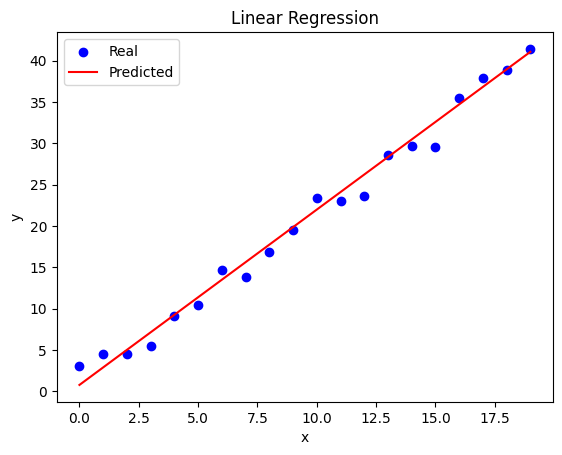

In [5]:
lr = supervised.LinearRegression(lr=0.001, epochs=1000)
lr.fit(X_reg, y_reg)

y_pred = [lr.predict([x[0]]) for x in X_reg]

plt.figure()
plt.scatter([x[0] for x in X_reg], y_reg, label="Real", color='blue')
plt.plot([x[0] for x in X_reg], y_pred, label="Predicted", color='red')
plt.title("Linear Regression")
plt.xlabel("x"); plt.ylabel("y")
plt.legend(); plt.show()

### 1.2. Logistic Regression

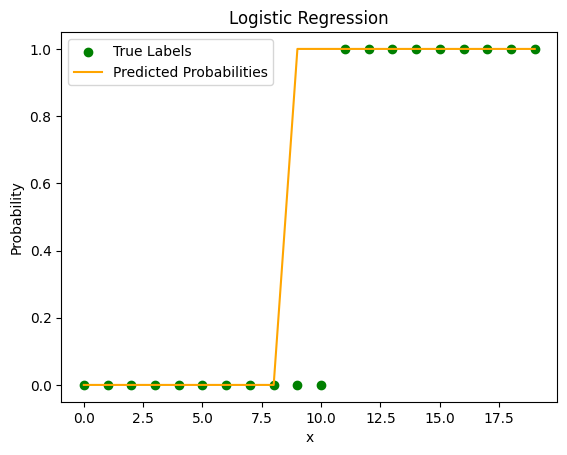

In [7]:
logr = supervised.LogisticRegression()
logr.fit(X_class, y_class)

probs = [logr.predict([x[0]]) for x in X_class]

plt.figure()
plt.scatter([x[0] for x in X_class], y_class, label="True Labels", color='green')
plt.plot([x[0] for x in X_class], probs, label="Predicted Probabilities", color='orange')
plt.title("Logistic Regression")
plt.xlabel("x"); plt.ylabel("Probability")
plt.legend(); plt.show()

### 1.3. KNN

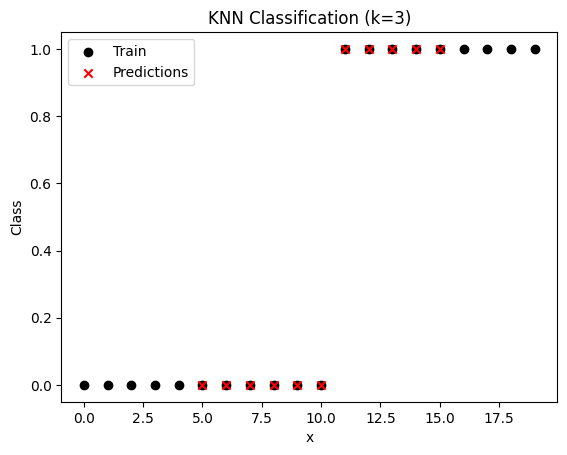

In [8]:
knn = supervised.K_Nearest_Neighbours(k=3)
knn.fit(X_class, y_class)

X_test = [[i] for i in range(5, 16)]
y_test = [knn.predict(xi) for xi in X_test]

plt.figure()
plt.scatter([x[0] for x in X_class], y_class, label="Train", color='black')
plt.scatter([x[0] for x in X_test], y_test, label="Predictions", color='red', marker='x')
plt.title("KNN Classification (k=3)")
plt.xlabel("x"); plt.ylabel("Class")
plt.legend(); plt.show()

### Unsupervised Learning:

In [9]:
X = []
centroids = [(2, 2), (8, 3), (5, 8)]
for cx, cy in centroids:
    for _ in range(20):
        x = cx + random.uniform(-1, 1)
        y = cy + random.uniform(-1, 1)
        X.append([x, y])

### 2.1. K-Means

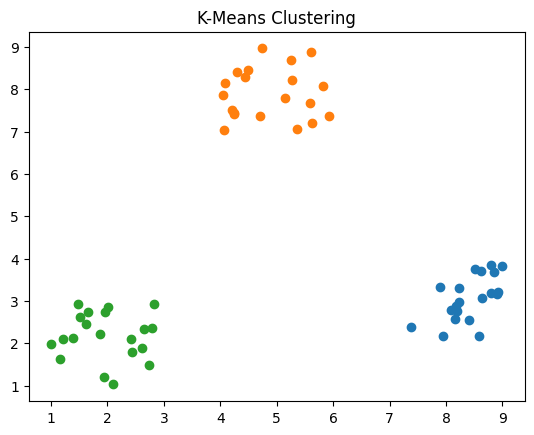

In [10]:
km = unsupervised.KMeans(k=3)
km.fit(X)
labels = km.labels_

plt.figure()
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], color=f"C{labels[i]}")
plt.title("K-Means Clustering")
plt.show()

### 2.2. DBSCAN

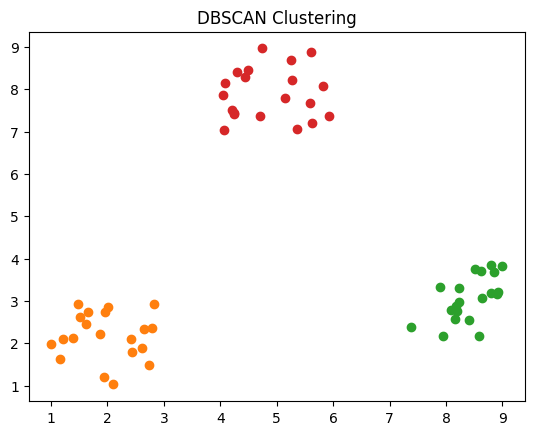

In [11]:
db = unsupervised.DBSCAN(eps=1.5, min_pts=5)
db.fit(X)
labels = db.labels_

plt.figure()
for i, point in enumerate(X):
    if labels[i] == -1:
        plt.scatter(point[0], point[1], color='black', marker='x', label="Noise" if i==0 else "")
    else:
        plt.scatter(point[0], point[1], color=f"C{labels[i]}")
plt.title("DBSCAN Clustering")
plt.show()

### 2.3. Hierarchical Clustering

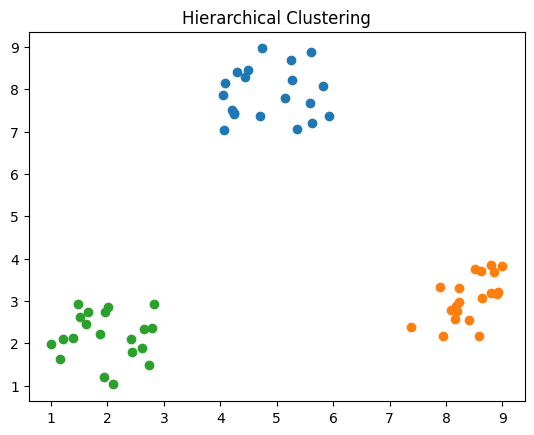

In [12]:
hc = unsupervised.HierarchicalClustering(n_clusters=3)
hc.fit(X)
labels = hc.labels_

plt.figure()
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], color=f"C{labels[i]}")
plt.title("Hierarchical Clustering")
plt.show()

### **Note:**

Although we used the exact same dataset to test KMC, DBSCAN, and HC, and the resulting plots may look nearly identical, it is important to understand that this **doesn't mean** the algorithms work the same way.

The similar-looking outputs are simply due to small size and well-separated nature of the dataset we used. In more complex or larger datasets, these algorithms can behave quite differently — each with its own strengths and weaknesses depending on the shape, density, and distribution of the data.

### Reinforcement Learning

In [13]:
states = [0, 1, 2, 3, 4]
actions = ['L', 'R']
goal = 4

def next_state(s, a):
    if a == 'L':
        return max(0, s - 1)
    elif a == 'R':
        return min(4, s + 1)

def reward(s):
    return 1 if s == goal else 0

### 3.1. Q-Learning

In [14]:
q_learning = reinforcement_learning.Q_Learning(states, actions)
for _ in range(200):
    s = 0
    while s != goal:
        a = q_learning.choose_action(s)
        s_ = next_state(s, a)
        r = reward(s_)
        q_learning.update(s, a, r, s_)
        s = s_

### 3.2. SARSA

In [15]:
sarsa = reinforcement_learning.SARSA(states, actions)
for _ in range(200):
    s = 0
    a = sarsa.choose_action(s)
    while s != goal:
        s_ = next_state(s, a)
        r = reward(s_)
        a_ = sarsa.choose_action(s_)
        sarsa.update(s, a, r, s_, a_)
        s, a = s_, a_

In [18]:
print("Q-Learning Policy:")
print([q_learning.choose_action(s) for s in states])

Q-Learning Policy:
['R', 'R', 'R', 'R', 'L']


In [19]:
print("SARSA Policy:")
print([sarsa.choose_action(s) for s in states])

SARSA Policy:
['R', 'R', 'R', 'R', 'L']


### **Note 2:**

Once again, the similarity between the results of the algorithms **does not mean** that they work quite same.

## Deep Learning

### 4.1. Perceptron

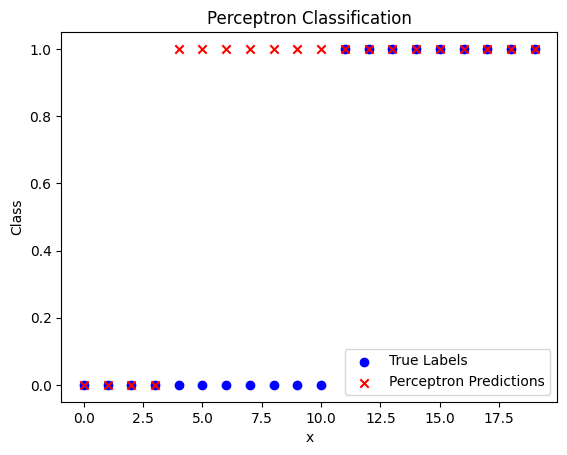

In [21]:
from deep_learning import Perceptron
# I almost forgot about it, thus I imported it in this cell rather than the very first one, in order to save time.

perceptron = Perceptron(input_dim=1, lr=0.1, epochs=20)
perceptron.fit(X_class, y_class)

y_pred = [perceptron.predict([x[0]]) for x in X_class]

plt.figure()
plt.scatter([x[0] for x in X_class], y_class, label="True Labels", color='blue')
plt.scatter([x[0] for x in X_class], y_pred, label="Perceptron Predictions", color='red', marker='x')
plt.title("Perceptron Classification")
plt.xlabel("x")
plt.ylabel("Class")
plt.legend()
plt.show()

### 4.2. MLP

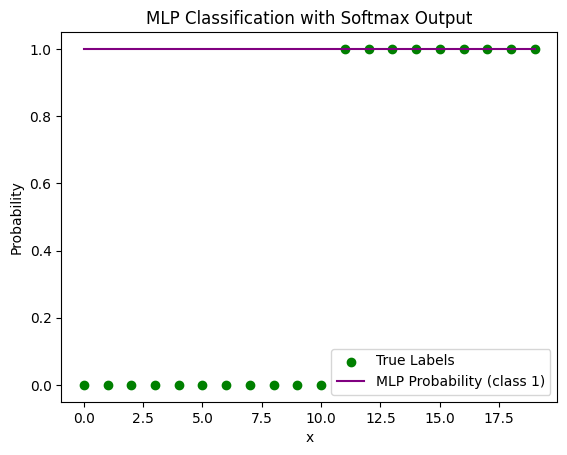

In [32]:
from deep_learning import MLP

mlp = MLP(input_dim=1, hidden_dim=4, output_dim=2, lr=0.1, epochs=100)
mlp.fit(X_class, y_class)

probs = [mlp.forward([x[0]])[1] for x in X_class]

plt.figure()
plt.scatter([x[0] for x in X_class], y_class, label="True Labels", color='green')
plt.plot([x[0] for x in X_class], probs, label="MLP Probability (class 1)", color='purple')
plt.title("MLP Classification with Softmax Output")
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.show()

## What We’ve Learned

As we have observed from the code block examples of the different algorithms:

- **Supervised models** like linear and logistic regression or KNN need labels and learn from examples. You saw how a straight‑line model handles simple trends, and how KNN leans on nearby points to make its call.

- **Unsupervised methods** like K‑Means, DBSCAN and hierarchical clustering don’t need labels at all. They just look for natural groupings.

- **Reinforcement learners** (Q‑Learning and SARSA) showed how an agent can learn by trial and error, balancing random exploration with greedy choices to find the best path through a simple grid.

- **Deep learning models** (the perceptron and our little MLP) reminded us that stacking layers and using non‑linear activations unlocks much richer decision boundaries—needed when data can’t be separated by a straight line.

Building everything from scratch gave us a front‑row seat to how each algorithm ticks under the hood. None of these implementations are production‑ready, but they’re perfect for seeing the core ideas in action before you reach for a library.